# Prueba de Hipótesis
En la siguiente celdas vamos a efectuar una prueba de hipótesis, que evalúa un método alternativo de enseñanza. El objetivo es validar si este nuevo método presenta significancia estadística y ayuda a los alumnos a obtener mejores calificaciones.

Dado que el universo de estudiantes es pequeño, la prueba se realiza utilizando una distribución t de Student. Si nuestra muestra fuese mayor, entonces podríamos utilizar una distribución normal.

Las pruebas de hiṕotesis suelen utilizarse para comparar dos ideas distintas, estos casos se conocen como tests A/B, conocido también por su nombre en inglés
"A/B testing". El universo a probar se divide en 2 grupos seleccionados de manera aleatoria, sobre el grupo A se aplica un determinado experimento, sobre el grupo B otro y se miden los resultados de la misma variable objetivo. `A` generalmente hace las veces de hipótesis nula y `B` de hipótesis alternativa. Si existe significancia estadística se rechaza `A` en favor de `B`. Este tipo de pruebas es muy valiosa para tomar decisiones sobre el comportamiento de los consumidores o clientes. Pueden encontrar mas info en este [artículo](https://www.kdnuggets.com/hypothesis-testing-and-ab-testing).

In [1]:
# Importar bibliotecas necesarias
import numpy as np
import scipy.stats as stats

# Generar datos ficticios para dos grupos de estudiantes
# Grupo A: Método tradicional
grupo_A = np.array([75, 80, 85, 90, 70, 88, 92, 78, 81, 85])

# Grupo B: Nuevo método de enseñanza
grupo_B = np.array([82, 85, 87, 90, 88, 93, 95, 84, 89, 91])

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(grupo_A, grupo_B)

# Establecer un nivel de significancia (por ejemplo, 0.05)
nivel_significancia = 0.05

# Imprimir los resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < nivel_significancia:
    print("Rechazamos la hipótesis nula (H₀). Hay una diferencia significativa en los promedios.")
else:
    print("No rechazamos la hipótesis nula (H₀). No hay suficiente evidencia para afirmar que hay una diferencia en los promedios.")


Estadístico t: -2.365964608355109
Valor p: 0.029406642199853523
Rechazamos la hipótesis nula (H₀). Hay una diferencia significativa en los promedios.


* * *
# Análisis de Correlacion Lineal
La correlación mide la fuerza y la dirección de la relación lineal entre dos variables. Es un valor que oscila entre -1 y 1.

## Coeficiente de Correlación de Pearson (r)
Es el método más común para calcular la correlación, donde:
- `r = 1`: Correlación positiva perfecta.
- `r = -1`: Correlación negativa perfecta.
- `r = 0`: No hay correlación lineal.

En el siguiente ejemplo vamos a analizar la correlación entre horas de estudio y las calificaciones obtenidas.

Coeficiente de Correlación de Pearson (r): 0.993



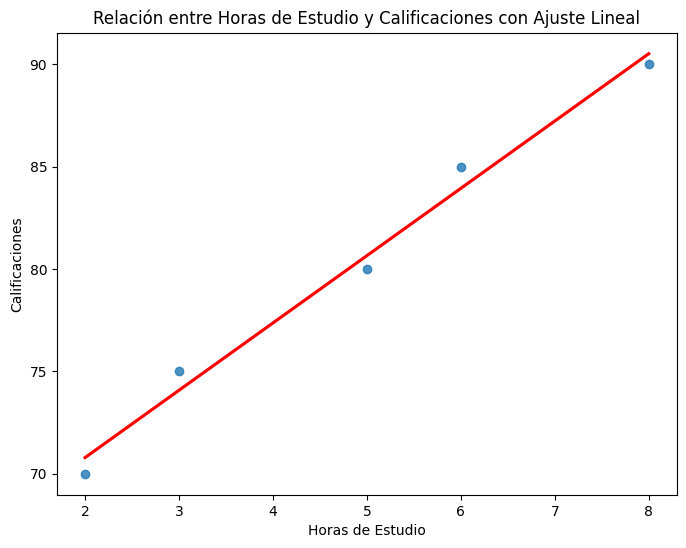

In [2]:
# Importar bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

# Crear un DataFrame con los datos simulados
data = pd.DataFrame({
    'Horas de Estudio': [2, 3, 5, 6, 8],
    'Calificaciones': [70, 75, 80, 85, 90]
})

# Calcular el coeficiente de correlación de Pearson
r, _ = pearsonr(data['Horas de Estudio'], data['Calificaciones'])

# Imprimir el coeficiente de correlación
print(f'Coeficiente de Correlación de Pearson (r): {r:.3f}\n')

# Crear un gráfico de dispersión con ajuste lineal
plt.figure(figsize=(8, 6))
sns.regplot(x='Horas de Estudio', y='Calificaciones', data=data, ci=None, line_kws={"color":"red"})

# Etiquetas y título
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificaciones')
plt.title('Relación entre Horas de Estudio y Calificaciones con Ajuste Lineal')

# Mostrar el gráfico
plt.show()


* * *

# Ajuste de Datos por Regresión Lineal
Finalmente presentamos un análisis por regresión lineal. El objetivo del ejemplo es determinar los coeficientes de una función lineal que nos permita predecir el salario recibido en función de los **años de experiencia**, **sexo** y **nivel de experiencia**.

Fundamentalmente se busca presentar conceptos generales de cómo realizar un análisis de regresión lineal. Para este caso no hemos separado el dataset, que es bastante pequeño, en entrenamiento y prueba. Sin embargo, esto es **absolutamente necesario** hacerlo cada vez que se entrena un modelo.

In [3]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Datos simulados
data = pd.DataFrame({
    'yrs_exp': [1, 2, 3, 4, 5],
    'sex': ['Hombre', 'Mujer', 'Hombre', 'Mujer', 'Hombre'],  # Variable categórica
    'seniority': ['Junior', None, 'Semi-Senior', 'Senior', 'Senior'],  # Variable categórica
    'salary': [29, 34, 42, 45, 49]  # Salario en miles de USD
})

data.head()


,yrs_exp,sex,seniority,salary
0,1,Hombre,Junior,29
1,2,Mujer,None,34
2,3,Hombre,Semi-Senior,42
3,4,Mujer,Senior,45
4,5,Hombre,Senior,49


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   yrs_exp    5 non-null      int64 
 1   sex        5 non-null      object
 2   seniority  4 non-null      object
 3   salary     5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


Dado que el dataframe tiene variables categóricas, vamos a convertirlas en numéricas.

In [5]:
def convert_seniority(row):
  if row == 'Junior':
    return 0
  elif row == 'Semi-Senior':
    return 1
  elif row == 'Senior':
    return 2

In [6]:
data["sex"] = data.sex.apply(lambda x: 0 if x == 'Hombre' else 1)

In [7]:
data["seniority"] = data.seniority.apply(lambda x: 'Junior' if not x else x)
data["seniority"] = data.seniority.apply(convert_seniority)

In [8]:
data.head()

,yrs_exp,sex,seniority,salary
0,1,0,0,29
1,2,1,0,34
2,3,0,1,42
3,4,1,2,45
4,5,0,2,49


In [9]:
data.describe()

,yrs_exp,sex,seniority,salary
count,5.000000,5.000000,5.0,5.000000
mean,3.000000,0.400000,1.0,39.800000
std,1.581139,0.547723,1.0,8.167007
min,1.000000,0.000000,0.0,29.000000
25%,2.000000,0.000000,0.0,34.000000
50%,3.000000,0.000000,1.0,42.000000
75%,4.000000,1.000000,2.0,45.000000
max,5.000000,1.000000,2.0,49.000000


Una vez que convertimos las variables a números, vamos a separar las variables independientes de la variable dependiente (también conocida como variable objetivo). La variables independientes conformarán una matriz `X` y el salario es un vector `y`. Concretamente, dado que se trata de un objeto tipo dataframe de la librería pandas, `X` es subconjunto del dataframe original, resultando en otro `pandas.DataFrame`. Por otro lado, `y` es un objeto del tipo `pandas.Series`

In [10]:
# Variables independientes (Años de Experiencia, Sexo, Cargo)
X = data[['yrs_exp', 'sex', 'seniority']]

# Variable dependiente (Salario)
y = data['salary']

# Mostramos los tipos de datos por pantalla
print(f'Tipo de dato de X: {type(X)}')
print(f'Tipo de dato de y: {type(y)}')

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

Tipo de dato de X: <class 'pandas.core.frame.DataFrame'>
Tipo de dato de y: <class 'pandas.core.series.Series'>


LinearRegression()

Nuestra función quedará modelada con los coeficientes obtenidos al entrenar el modelo.

```
y = β₀ + β₁*yrs_exp + β₂*sex + β₃*seniority
```



In [11]:
# Coeficientes (β₁ para Años de Experiencia, β₂ para Sexo, β₃ para años de experiencia)
print(f'Constante (β₀): {model.intercept_}')
print(f'Coeficientes (β₁, β₂, β₃): {model.coef_}')

# Predicciones
y_hat = model.predict(X)


Constante (β₀): 25.499999999999996
Coeficientes (β₁, β₂, β₃): [ 4.5 -0.5  1. ]


In [12]:
# Calculo del error del modelo de regresión lineal
print(f"Error cuadrático medio: {mean_squared_error(y, y_hat)}")
print(f"Coeficiente de determinación (R^2): {r2_score(y, y_hat)}")

Error cuadrático medio: 1.1999999999999986
Coeficiente de determinación (R^2): 0.9775112443778111


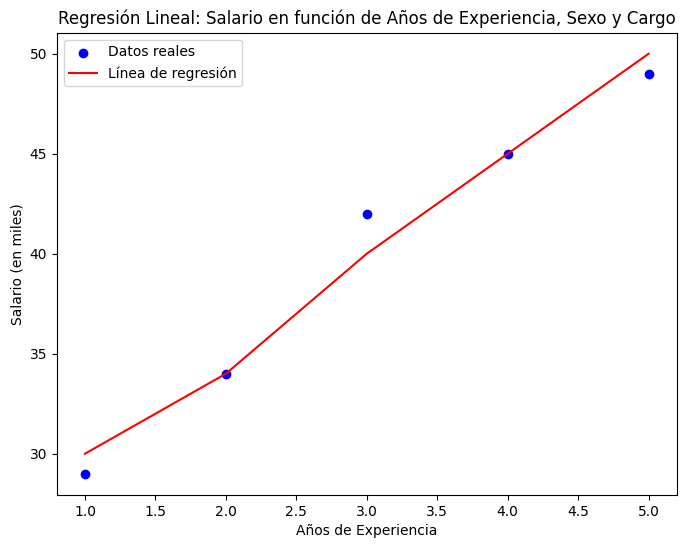

In [13]:
# Visualización del ajuste para los años de experiencia
plt.figure(figsize=(8, 6))
plt.scatter(data['yrs_exp'], y, color='blue', label='Datos reales')
plt.plot(data['yrs_exp'], y_hat, color='red', label='Línea de regresión')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario (en miles)')
plt.title('Regresión Lineal: Salario en función de Años de Experiencia, Sexo y Cargo')
plt.legend()
plt.show()

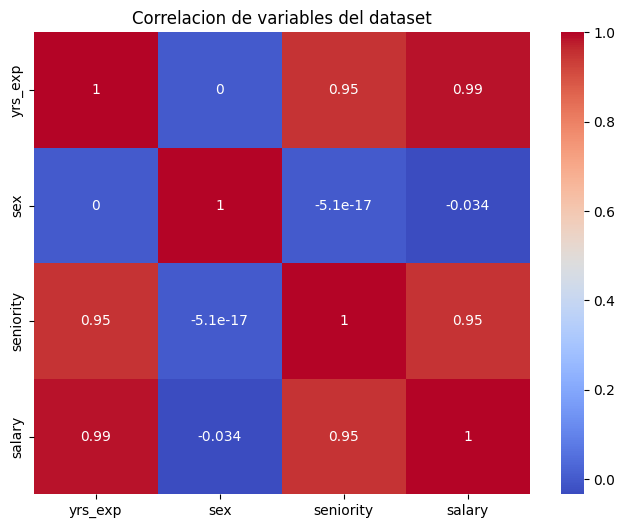

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

plt.title("Correlacion de variables del dataset")
plt.show()

Se puede observar que los años de experiencia guardan una correlación muy alta con el nivel de experiencia (seniority). Utilizar variables que tienen un alto grado de correlacion lineal puede afectar el ajuste de un modelo de regresión lineal.
Por lo tanto, podemos quitar alguna de las dos, por ej. el seniority y verificar cómo ajusta al dataset de ejemplo además de analizar cuál es el RMSE  y el R²

In [15]:
# Variables independientes (Años de Experiencia, Sexo, Cargo)
X_1 = data[['yrs_exp', 'sex']]

# Variable dependiente (Salario)
y = data['salary']

# Crear el modelo de regresión lineal
model_1 = LinearRegression()

# Entrenar el modelo con los datos
model_1.fit(X_1, y)

LinearRegression()

In [ ]:
# Coeficientes (β₁ para Años de Experiencia, β₂ para Sexo, β₃ para años de experiencia)
print(f'Constante (β₀): {model_1.intercept_}')
print(f'Coeficientes (β₁, β₂): {model_1.coef_}')

# Predicciones
y_hat_1 = model_1.predict(X_1)

# Calculo del error del modelo de regresión lineal
print(f"Error cuadrático medio: {mean_squared_error(y, y_hat_1)}")
print(f"Coeficiente de determinación (R^2): {r2_score(y, y_hat_1)}")

In [ ]:
# Visualización del ajuste para los años de experiencia
plt.figure(figsize=(8, 6))
plt.scatter(data['yrs_exp'], y, color='blue', label='Datos reales')
plt.plot(data['yrs_exp'], y_hat_1, color='red', label='Línea de regresión')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario (en miles)')
plt.title('Regresión Lineal: Salario en función de Años de Experiencia, Sexo y Cargo')
plt.legend()
plt.show()

Si bien el cálculo de residuos arroja un error mayor (aumenta el RMSE y disminuye el R²), eliminar una de las variables codependientes permite que el modelo generalice mejor para nuevos datos de entrada. Esto permite que las predicciones realizadas para nuevos datos sean mejores. En definitiva, evitamos que exista sobreajuste (overfitting) del modelo.

## Comparando los coeficientes para analizar el impacto
Ahora bien, no podemos comparar directamente el impacto de cada variable independiente ya que se encuentran en escalas distintas. Por lo tanto para poder efectuar la comparación correctamente, debemos escalar los datos de entrada al modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Recordar que
# X_1 = data[['yrs_exp', 'sex']]

scaler = StandardScaler()
X_1_scaled = scaler.fit_transform(X_1)
X_1_scaled


Se puede observar que los valores se han escalado

In [ ]:
# Generamos un nuevo modelo
model_1_scaled = LinearRegression()

# Entrenamos con los datos normalizados
model_1_scaled.fit(X_1_scaled, y)

# Coeficientes escalados
print(f'Constante (β₀): {model_1_scaled.intercept_}')
print(f'Coeficientes (β₁, β₂): {model_1_scaled.coef_}')

Podemos concluir que los años de experiencia son un predictor mucho más importante que el género, para determinar el salario.